In [18]:
## Set up PyTorch Dataset and DataLoader

# Load images and annotations in a format for training an object detection model

import os
from torchvision.datasets import VOCDetection
from torchvision import transforms

# Get the absolute path to the dataset
repo_root = "C:/Users/kamed/Desktop/argonne_K/pascal-voc-project"

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load VOC dataset
voc_dataset = VOCDetection(
    root=repo_root,        # absolute path to VOCdevkit
    year="2012",
    image_set="train",
    download=False,
    transform=transform
)

print(f"Number of images in dataset: {len(voc_dataset)}")

Number of images in dataset: 5717


In [19]:
import glob
import os

voc2012_root = "C:/Users/kamed/Desktop/argonne_K/pascal-voc-project/VOCdevkit/VOC2012" 
xml_files = glob.glob(os.path.join(voc2012_root, "Annotations", "*.xml"))
print("Number of XML files:", len(xml_files))

## Prepare train/val splits
repo_root = "C:/Users/kamed/Desktop/argonne_K/pascal-voc-project"
train_dataset = VOCDetection(root=repo_root, year="2012", image_set="train", transform=transform)
val_dataset = VOCDetection(root=repo_root, year="2012", image_set="val", transform=transform)

print(f"Training images: {len(train_dataset)}, Validation images: {len(val_dataset)}")

Number of XML files: 17125
Training images: 5717, Validation images: 5823


In [20]:
## Data Augmentation to increase model generalization
# includes: random horizontal flips, random color jitter, resizing/scaling

from torchvision.transforms import functional as F
import random

def augment_image(img, target):
    # Random horizontal flip
    if random.random() > 0.5:
        img = F.hflip(img)
        w, h = img.size
        for obj in target['annotation']['object']:
            xmin = int(obj['bndbox']['xmin'])
            xmax = int(obj['bndbox']['xmax'])
            obj['bndbox']['xmin'] = str(w - xmax)
            obj['bndbox']['xmax'] = str(w - xmin)
    return img, target

In [21]:
## Verify images, annotations, and transforms
import torch

# Create DataLoader and tell DataLoader how to handle varying sizes

from torch.utils.data import DataLoader
def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = torch.utils.data.DataLoader(
    voc_dataset,
    batch_size=4,
    shuffle=True,
    collate_fn=collate_fn
)

image length: 4
image shape: torch.Size([3, 388, 500])


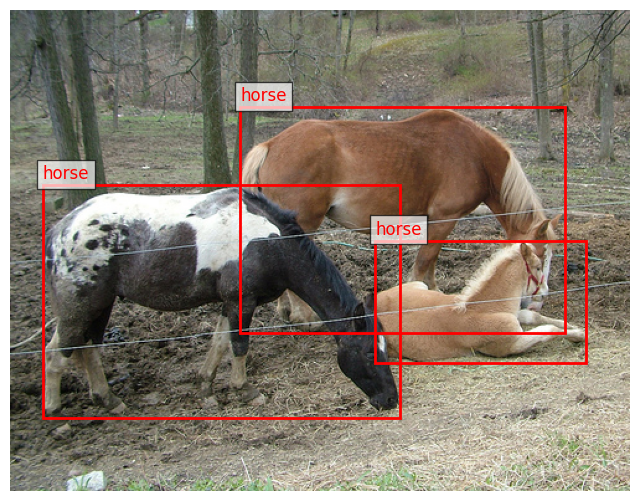

In [22]:
## Verify images, annotations, and transforms

# Loop through one batch and visualize
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

batch = next(iter(train_loader))
images, targets = batch  # depends on dataset implementation

print("image length:", len(images))  # batch size
print("image shape:", images[0].shape)  # first image shape

# Example visualization for first image in batch
img = images[0].permute(1, 2, 0).numpy()  # C x H x W -> H x W x C
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(img)

# Add bounding boxes
for obj in targets[0]['annotation']['object']:
    bbox = obj['bndbox']
    xmin, ymin, xmax, ymax = int(bbox['xmin']), int(bbox['ymin']), int(bbox['xmax']), int(bbox['ymax'])
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin - 5, obj['name'], color='red', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.7))
plt.axis("off")
plt.show()